In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [50]:
df1_o=pd.read_csv('train_HK6lq50.csv')
df1_o.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [51]:
df1=df1_o.copy()

In [52]:
df2_o=pd.read_csv('test_wF0Ps6O.csv')
df2_o.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [53]:
df2=df2_o.copy()

In [54]:
dependent_var=df1['is_pass']

In [55]:
df1=df1.drop(['is_pass'],axis=1)
df1.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0


In [56]:
df_o=pd.concat([df1,df2],sort=False,axis=0)

In [57]:
df=df_o.copy()
df.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0


In [58]:
df_n=df[['program_duration','test_id','trainee_id','city_tier','age','total_programs_enrolled','trainee_engagement_rating']]
df_n.head()
col=df_n.columns

In [59]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [60]:
df_n=imp.fit_transform(df_n)

In [61]:
df_n=pd.DataFrame(df_n)

In [62]:
df_n.columns=col
df_n.head()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating
0,136.0,150.0,9389.0,3.0,24.000000,5.0,1.0
1,131.0,44.0,16523.0,4.0,26.000000,2.0,3.0
2,120.0,178.0,13987.0,1.0,40.000000,1.0,2.0
3,117.0,32.0,13158.0,3.0,36.478038,4.0,1.0
4,131.0,84.0,10591.0,1.0,42.000000,2.0,4.0


In [46]:
df_n.isnull().sum()

program_duration             0
test_id                      0
trainee_id                   0
city_tier                    0
age                          0
total_programs_enrolled      0
trainee_engagement_rating    0
dtype: int64

In [23]:
df_n_train=df_n[:73147]
df_n_train=pd.concat([df_n_train,dependent_var],axis=1)

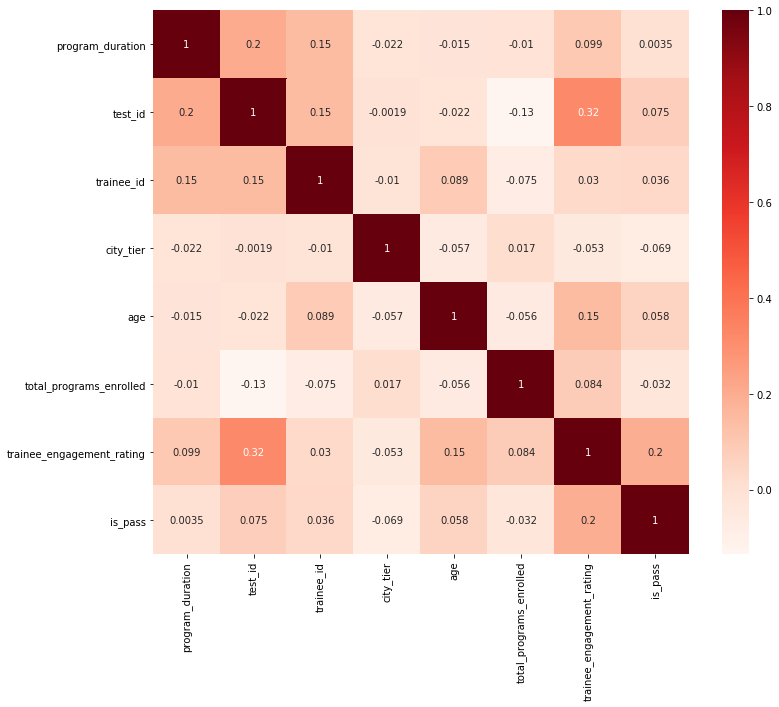

In [24]:
#correlation matrix
plt.figure(figsize=(12,10))
cor=df_n_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [27]:
#isolating(picking) features
cor_target=abs(cor['is_pass'])
relevant_features=cor_target[cor_target<0.05]
print(relevant_features,'\n')

program_duration           0.003545
trainee_id                 0.035900
total_programs_enrolled    0.031695
Name: is_pass, dtype: float64 



In [63]:
df_c=df[['id','program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped']]
df_c.head()

,id,program_id,program_type,test_type,difficulty_level,gender,education,is_handicapped
0,9389_150,Y_1,Y,offline,intermediate,M,Matriculation,N
1,16523_44,T_1,T,offline,easy,F,High School Diploma,N
2,13987_178,Z_2,Z,online,easy,M,Matriculation,N
3,13158_32,T_2,T,offline,easy,F,Matriculation,N
4,10591_84,V_3,V,offline,intermediate,F,High School Diploma,N


In [2]:
len(df_c['education'].unique())

NameError: name 'df_c' is not defined

In [ ]:
gender=2
is_handicapped=2

In [124]:
df_c1=df_c[['gender','is_handicapped']]
df_c.drop(['gender','is_handicapped'],axis=1)

,id,program_id,program_type,test_type,difficulty_level,education
0,9389_150,Y_1,Y,offline,intermediate,Matriculation
1,16523_44,T_1,T,offline,easy,High School Diploma
2,13987_178,Z_2,Z,online,easy,Matriculation
3,13158_32,T_2,T,offline,easy,Matriculation
4,10591_84,V_3,V,offline,intermediate,High School Diploma
...,...,...,...,...,...,...
31344,18820_22,T_3,T,offline,intermediate,No Qualification
31345,1641_96,V_1,V,offline,easy,Matriculation
31346,7010_157,Y_1,Y,online,easy,Bachelors
31347,14895_179,Z_1,Z,offline,easy,Matriculation


In [ ]:
df

In [130]:
df_c1_t=df_c1[:73147]
df_c1_t=pd.concat([df_c1_t,dependent_var],axis=1,sort=False)

In [131]:
df_c1_t.head()

,gender,is_handicapped,is_pass
0,M,N,0
1,F,N,1
2,M,N,1
3,F,N,1
4,F,N,1


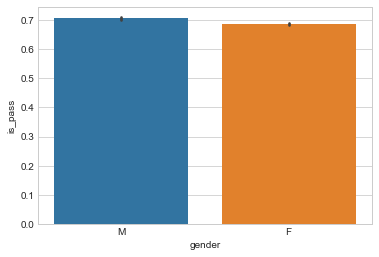

In [135]:
sns.barplot(x='gender',y='is_pass',data=df_c1_t)

In [ ]:
df_c1=pd.concat([df_c1,dependent_var],axis=1,sort=False)

In [137]:
def imp(cols):
    gen=cols[0]
    y=cols[1]
    if(gen=='M'):
        return 1
    elif(gen=='F'):
        return 0
    else:
        return
def imp(cols):
    ish=cols[0]
    y=cols[1]
    if(ish=='N'):
        return 1
    if(ish=='Y'):
        return 0

In [139]:
df_c1['gender'] = df_c1[['gender','is_pass']].apply(imp,axis=1)
df_c1['is_handicapped']=df_c1[['is_handicapped','is_pass']].apply(imp1,axis=1)

KeyError: "['is_pass'] not in index"

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
encoder=LabelEncoder()

In [66]:
df_ec=df_c.apply(encoder.fit_transform)

In [67]:
df_ec.head()

,id,program_id,program_type,test_type,difficulty_level,gender,education,is_handicapped
0,100865,15,5,0,2,1,3,0
1,36990,2,1,0,0,0,1,0
2,23435,20,6,1,0,1,3,0
3,18709,3,1,0,0,0,3,0
4,3523,10,3,0,2,0,1,0


In [69]:
df_n.reset_index(drop=True, inplace=True)
df_ec.reset_index(drop=True, inplace=True)

In [70]:
df_num=pd.concat([df_n,df_ec],axis=1,sort=False)
df_num.head()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,id,program_id,program_type,test_type,difficulty_level,gender,education,is_handicapped
0,136.0,150.0,9389.0,3.0,24.000000,5.0,1.0,100865,15,5,0,2,1,3,0
1,131.0,44.0,16523.0,4.0,26.000000,2.0,3.0,36990,2,1,0,0,0,1,0
2,120.0,178.0,13987.0,1.0,40.000000,1.0,2.0,23435,20,6,1,0,1,3,0
3,117.0,32.0,13158.0,3.0,36.478038,4.0,1.0,18709,3,1,0,0,0,3,0
4,131.0,84.0,10591.0,1.0,42.000000,2.0,4.0,3523,10,3,0,2,0,1,0


In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [1]:
scaler = StandardScaler()
X = scaler.fit_transform(df_num)

NameError: name 'StandardScaler' is not defined

In [87]:
dX=pd.DataFrame(X)
dX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.130261,1.153121,-0.080111,0.742769,-1.749439e+00,1.949094,-1.053781,1.611698,0.699117,0.955671,-0.823704,1.272865,0.932867,1.231221,-0.311617
1,0.404862,-0.916402,1.170005,1.731122,-1.469036e+00,-0.473368,0.454016,-0.505795,-1.470587,-1.245706,-0.823704,-0.834580,-1.071964,-0.510303,-0.311617
2,-1.191016,1.699787,0.725613,-1.233938,4.937842e-01,-1.280855,-0.299883,-0.955151,1.533619,1.506015,1.214028,-0.834580,0.932867,1.231221,-0.311617
3,-1.626255,-1.150687,0.580344,0.742769,-9.961912e-16,1.141607,-1.053781,-1.111820,-1.303687,-1.245706,-0.823704,-0.834580,-1.071964,1.231221,-0.311617
4,0.404862,-0.135450,0.130520,-1.233938,7.741871e-01,-0.473368,1.207915,-1.615245,-0.135385,-0.145017,-0.823704,1.272865,-1.071964,-0.510303,-0.311617


In [88]:
col=list(df_num.columns)
dX.columns=col
dX.head()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,id,program_id,program_type,test_type,difficulty_level,gender,education,is_handicapped
0,1.130261,1.153121,-0.080111,0.742769,-1.749439e+00,1.949094,-1.053781,1.611698,0.699117,0.955671,-0.823704,1.272865,0.932867,1.231221,-0.311617
1,0.404862,-0.916402,1.170005,1.731122,-1.469036e+00,-0.473368,0.454016,-0.505795,-1.470587,-1.245706,-0.823704,-0.834580,-1.071964,-0.510303,-0.311617
2,-1.191016,1.699787,0.725613,-1.233938,4.937842e-01,-1.280855,-0.299883,-0.955151,1.533619,1.506015,1.214028,-0.834580,0.932867,1.231221,-0.311617
3,-1.626255,-1.150687,0.580344,0.742769,-9.961912e-16,1.141607,-1.053781,-1.111820,-1.303687,-1.245706,-0.823704,-0.834580,-1.071964,1.231221,-0.311617
4,0.404862,-0.135450,0.130520,-1.233938,7.741871e-01,-0.473368,1.207915,-1.615245,-0.135385,-0.145017,-0.823704,1.272865,-1.071964,-0.510303,-0.311617


In [90]:
df_num_train=dX[:73147]
df_num_test=dX[73147:]

In [91]:
train_len=int(0.8*(df1.shape[0]))

In [92]:
train_x,train_y=df_num_train[:train_len],dependent_var[:train_len]
test_x,test_y=df_num_train[train_len:],dependent_var[train_len:]

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [106]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=40, criterion='gini')

In [107]:
rfc1.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [96]:
pred=rfc1.predict(test_x)

In [97]:
print ("\nAUC - ROC : ", roc_auc_score(test_y,pred))


AUC - ROC :  0.5728338800460853


In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
confusion_matrix(test_y,pred)

array([[ 876, 3660],
       [ 479, 9615]], dtype=int64)

In [100]:
RFC =  RandomForestClassifier(n_estimators = 100,random_state = 42)

In [101]:
RFC.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [102]:
print ("\nAUC - ROC : ", roc_auc_score(test_y,RFC.predict(test_x)))


AUC - ROC :  0.6801126509575424


In [ ]:
max_leaf_nodes=[15000,20000,25000]

# for loop to iterate for each leaf size
for m in max_leaf_nodes :
    model = RandomForestClassifier(n_estimators = 200, n_jobs = -1,random_state =50,min_samples_leaf = 1, max_depth = 40, max_leaf_nodes=m)
    model.fit(train_x,train_y)
    print("\n Leaf size :", m)
    print ("AUC - ROC : ", roc_auc_score(test_y,model.predict(test_x)))